# Project: Investigate a Dataset - [no showappointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#cleaning">Data cleaning</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.


### Question(s) for Analysis
**Research Question 1**: Is there a relationship between the number of diseases the patient have and coming to the appointment?

 **Research Question 2**:  Is there a relationship between the age of the patient and coming to the appointment?

 **Research Question 3**:  Is there a relationship between the day of the appointment and coming to the appointment?

In [156]:
#importing the required tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In this section we will start to acccess our data and take a close look to the records and the features of the dataset and start to check for problems like duplications , missing data or invalid data type.


***Accessing data***

we will start by viewing the raw data and showing a sample of it and showing some statistical data

In [157]:
## first let's load our dataset using pandas
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')


In [158]:
##now let's see the information of the dataset(number of columns , rows , null values and the type of each column)
df.info()
##we get 14 columns and 110527 rows and no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [159]:
## let's see the first 10 rows of our dataset
df.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


In [160]:
##let's see the statistics of our dataset(mean , std and etc)
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


***Checking for missing data***

we will check if we have nan values which is null values(missing)

In [161]:
##check if there is null values
df.isnull().values.any()

False

conclusion: no missing values found

***Checking for Duplcications***

we will check if there is any duplicates in the records

In [162]:
##check for duplication
##of course there will be alot of appointement in same day and age and the other columns
##but there must not be any duplicates in the primary keys as id (PatientId and AppointmentID )
## first let's check if there is duplicated patient id(if true this means there is duplicated)
df.duplicated(subset=['PatientId']).any()

True

In [163]:
## we found that there is duplicated , now let's see the number of the duplicated cells
sum(df['PatientId'].duplicated())

48228

In [164]:
##let's check if there is duplicated values in the appointment id
df.duplicated(subset=['AppointmentID']).any()

False

In [165]:
##now let's check if the same patient id is duplicated with the same appointment id
## if true this means that the dataset contain false or wrong data
## if false this mean that the same patient come to visit doctor on different appointments and this normal
df.duplicated(subset=['PatientId','AppointmentID']).any()

False

conclusion: we found that the PatientId have some duplicates which is not considered a problem because the swe found that the PatientId have some duplicates which is not considered a problem because the same patient can go to the same doctor many times and that's why we tried to see if there is duplicates in the AppointmentID and if there is duplicates between both of the PatientId adn the AppointmentID in the same record and we didn't find that so it is ok.

***Checking for flase/outrange data***

check if there is any values that is considered invalid like negative age number , etc.

In [166]:
##let's check if there is any negative values in the numeric columns ('PatientId','Scholarship',
##'Hipertension','Diabetes','Alcoholism','Handcap','AppointmentID','SMS_received')
##after checking each and every column for negative values i found that only 'Age' column contains negative value
(df[['PatientId','Scholarship','Hipertension','Diabetes','Alcoholism','Handcap','AppointmentID','SMS_received']] < 0).values.any()

False

In [167]:
(df[['Age']] < 0).values.any()

True

In [168]:
## for the gender we have to check that all the values or only 'M' or 'F'
df['Gender'].unique()

array(['F', 'M'], dtype=object)

In [169]:
## for the NO-show we have to check that all the values or only 'Yes' or 'No'
df['No-show'].unique()

array(['No', 'Yes'], dtype=object)

concluison: we found that there is negative values in the age column and we checked the rest and there wasn't any problem with them

<a id='cleaning'></a>
### Data Cleaning
in this section we will start to clean our data from all the problems we searched for in tht data wranglind section like missing values , false values and invalid data types
 

In [170]:
##as we see there are some changes that must be done in the data set to be clean
#first we will remove the rows that have negative age values
df.drop(df[df['Age'] < 0].index,inplace = True)

In [171]:
# as we see the patient id is of type float so let's use what we learned in 'Fixing datatypes' to change it to int
df['PatientId']=df['PatientId'].astype('int64')

In [172]:
##let's change the ScheduledDay and AppointmentDay into datetime format so we can make analysis on the month and day of the appointments
##we can do it by using  the method we use it in the first project 
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110526 non-null  int64              
 1   AppointmentID   110526 non-null  int64              
 2   Gender          110526 non-null  object             
 3   ScheduledDay    110526 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110526 non-null  datetime64[ns, UTC]
 5   Age             110526 non-null  int64              
 6   Neighbourhood   110526 non-null  object             
 7   Scholarship     110526 non-null  int64              
 8   Hipertension    110526 non-null  int64              
 9   Diabetes        110526 non-null  int64              
 10  Alcoholism      110526 non-null  int64              
 11  Handcap         110526 non-null  int64              
 12  SMS_received    110526 non-null  int64              
 13  No-show       

In [173]:
## now let's extract the month from the appointmentday and the day using the methods we used in the first project
##we will extract the month and day and append each one of them to a new column
df['month'] = df['AppointmentDay'].dt.month
df['day'] = df['AppointmentDay'].dt.day_name()

In [174]:
df['month'].value_counts()

5    80841
6    26450
4     3235
Name: month, dtype: int64

In [175]:
df['day'].value_counts()

Wednesday    25867
Tuesday      25640
Monday       22714
Friday       19019
Thursday     17247
Saturday        39
Name: day, dtype: int64

In [176]:
##let's create a column that contains the count of the famous 'features' disease that the patient have
df['number_ofdisease'] = df['Hipertension']+df['Diabetes']+df['Alcoholism']+df['Handcap']
df['number_ofdisease'].value_counts()

0    84114
1    18014
2     7710
3      624
4       63
5        1
Name: number_ofdisease, dtype: int64

In [177]:
##we learned in the wine case study that it will be a problem to leave a column name with a dash betweeen it so we will change it
## it into a underscore
df.rename(columns={'No-show':'No_Show'}, inplace=True)

conclusion: we solved the negative values data and the wrong datat types problem and renamed the no-show column adn also extracted a specific part from a column and append it into a new column for further use

<a id='eda'></a>
## Exploratory Data Analysis

In this section we will start creating visuals to help us understand the data making it more obvious in the terms of the values of the some columns itself and the relationship betweeen the records of different features and each other





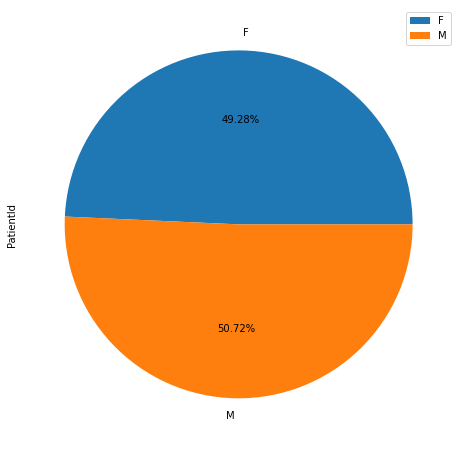

In [178]:
PatientId_no_duplicate = pd.pivot_table(df, index='Gender', values='PatientId').plot(kind='pie',figsize=(8,8), autopct='%.2f%%',subplots=True)

50.72 of the patients were male and the rest are female

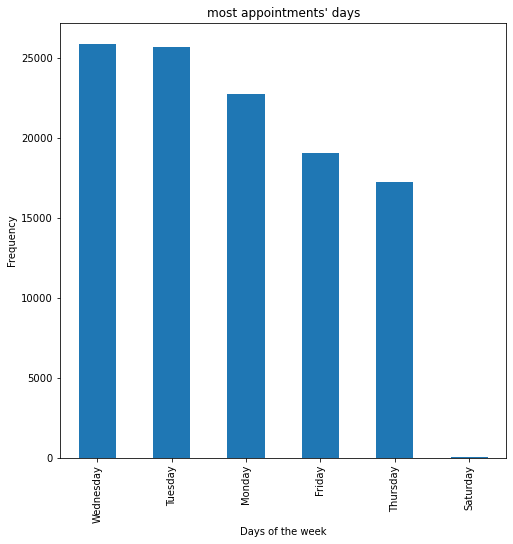

In [179]:
ind = df['day'].value_counts().index
df['day'].value_counts()[ind].plot(kind='bar', figsize=(8,8));
plt.xlabel('Days of the week') 
plt.ylabel('Frequency')
plt.title("most appointments' days");

no appointments on sunday and the most day the appointments were on wednesday and tuesday

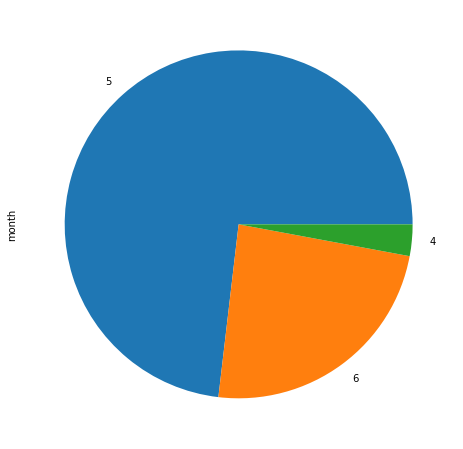

In [180]:
ind = df['month'].value_counts().index
df['month'].value_counts()[ind].plot(kind='pie', figsize=(8,8));

most of the appointments were on may

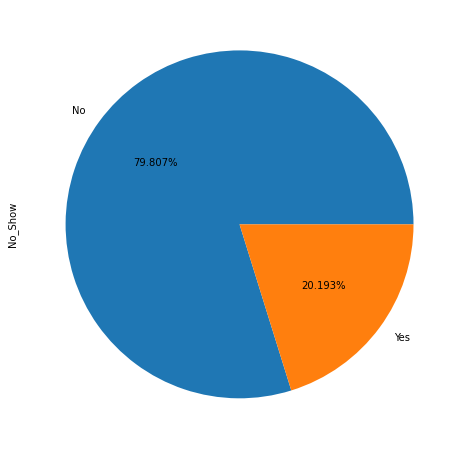

In [181]:
df['No_Show'].value_counts().plot(kind='pie',figsize=(8,8),autopct='%.3f%%');

20.193% of the patients didn't show

In [182]:
df_a = df[df['No_Show']=='Yes']
df_b = df[df['No_Show'] == 'No']

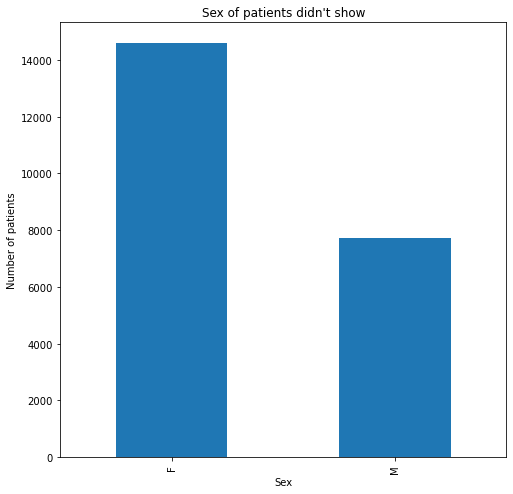

In [183]:
df_a['Gender'].value_counts().plot(kind = 'bar',figsize=(8,8))
plt.xlabel('Sex')
plt.ylabel('Number of patients')
plt.title("Sex of patients didn't show");

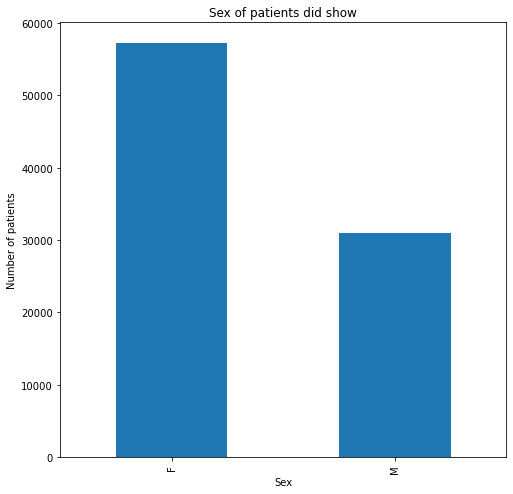

In [184]:
df_b['Gender'].value_counts().plot(kind = 'bar',figsize=(8,8));
plt.xlabel('Sex') 
plt.ylabel('Number of patients')
plt.title("Sex of patients did show");

we splited the data frame into two dataframes with respect to the showing to the appointment 
and we found that most of appointments' patient were female
most appointments with no_show were female and with showing were female too

### Research Question 1 (is there a relationship between the number of diseases the patient have and coming to the appointment?)

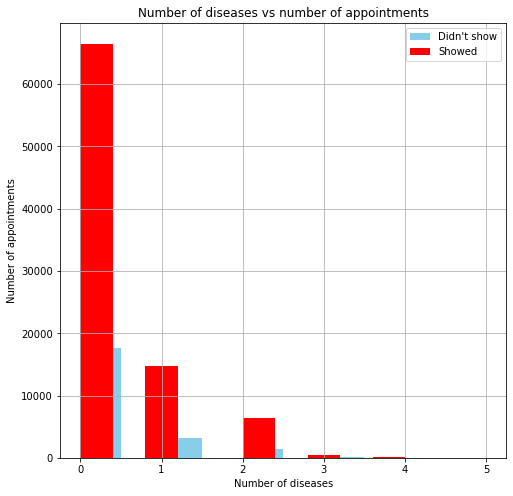

In [185]:
df_a.number_ofdisease.hist(figsize=(8,8),color = "skyblue");
df_b.number_ofdisease.hist(figsize=(8,8),color = "r");
plt.xlabel('Number of diseases')
plt.ylabel('Number of appointments')
plt.title('Number of diseases vs number of appointments')
plt.legend(["Didn't show","Showed"]);

1)No relation ship between the number of diseases and the attendance of the appointment

2)Most of patients that schedule an appointment didn't suffer from any disease of diseases mentioned above

### Research Question 2  (Is there a relationship between the age of the patient and coming to the appointment?)

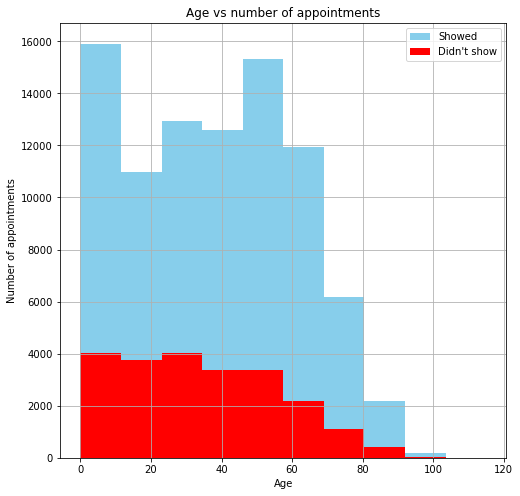

In [191]:
df.loc[df['No_Show']==0].Age.hist(figsize=(8,8),color = "skyblue");
df.loc[df['No_Show']==1].Age.hist(figsize=(8,8),color = "r");
plt.xlabel('Age') 
plt.ylabel('Number of appointments')
plt.title("Age vs number of appointments")
plt.legend(['Showed',"Didn't show"])

1) young children and people between the age of 50 and 58 are the most committed people to their appointments

2)most of the appointments have been attended

3) people older than 70 are the most people to not miss their appointments

4)young children and adults between 25 and 35 have the  most high absence

### Research Question 3  (Is there a relationship between the day of the appointment and coming to the appointment?)

In [187]:
df['No_Show'] = df['No_Show'].str.lower().replace({'yes': 1, 'no': 0})



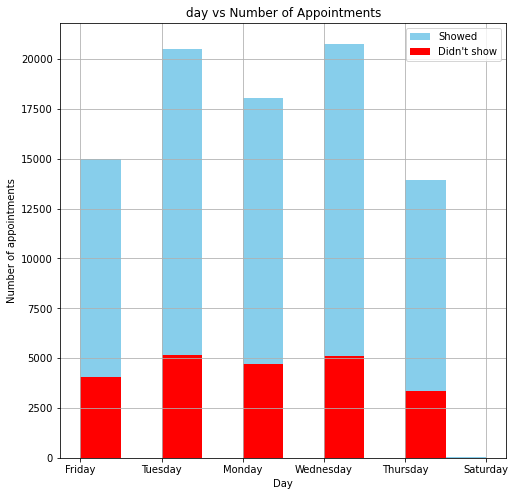

In [188]:
df.loc[df['No_Show']==0].day.hist(figsize=(8,8),color = "skyblue");
df.loc[df['No_Show']==1].day.hist(figsize=(8,8),color = "r");
plt.xlabel('Day') 
plt.ylabel('Number of appointments') 
plt.title("day vs Number of Appointments");
plt.legend(['Showed',"Didn't show"]);

1)tuesday and wednesday have the most missed and attended appointments

2)saturday is the most day with no appointments on it

array([<AxesSubplot:ylabel='No_Show'>], dtype=object)

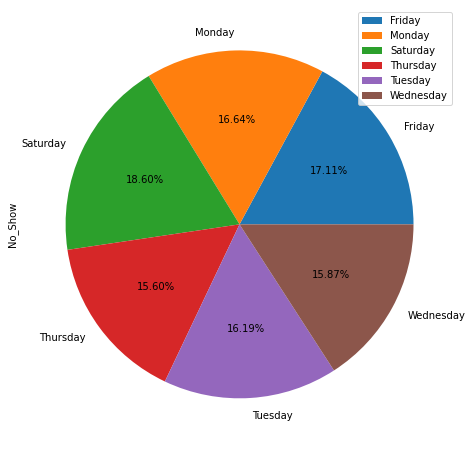

In [189]:
pd.pivot_table(df, index='day', values='No_Show').plot(kind='pie',figsize=(8,8), autopct='%.2f%%',subplots=True)

1)saturday is the most day with missed appointments

2)thursday is the day with less missed appointments

<a id='conclusions'></a>
## Conclusions

1) About 20.193 % of appointments are missed

2) Most of the missed appointments' patients are female

3) young children and adults between 25 and 35 have the most high absence

4) May is the month with the most missed appointments

5) Saturday is the day with the most missed appointments

limitations : 
1) we don't have the reason for the appointment( a clear name for the disease he has or symptoms)
2) we didn't know the reason people are absence and if there were any reasons given for missing the appointments or no


## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [190]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1